## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę TEAMS.

## Regresja logistyczna

Perceptron bazujący na modelu sztucznego neuronu jest dobrym algorytmem, aby wyrobić sobie pewną intuicję, jednak nie jest on powszechnie stosowany do rozwiązywania problemów klasyfikacji. Głównym problemem jest wykorzystywana w nim funkcja aktywacji oraz, w konsekwencji, sposób uczenia. Funkcja skokowa Heaviside'a jest nieróżniczkowalna w punkcie $x=0$, a jej pochodna wynosi $0$ w każdym innym punkcie. Powoduje to, że metody gradientowe (w tym metoda gradientu prostego) nie mogą być stosowane do optymalizacji wag. Wiele algorytmów, w tym implementowana regresja liniowa, wykorzystuje metody gradientowe do optymalizacji. Aby to było możliwe w przypadku perceptronu, należy zmienić funkcję aktywacji na taką, która będzie różniczkowalna w każdym punkcie.

### Funkcja sigmoidalna

Funkcją, która spełnia powyższe wymagania jest funkcja sigmoidalna, zwana również funkcją logistyczną. Dana jest wzorem:

$$f(x) = \frac{1}{1+e^{-x}}$$

Poniższy obraz przedstawia wykres funkcji sigmoidalnej.

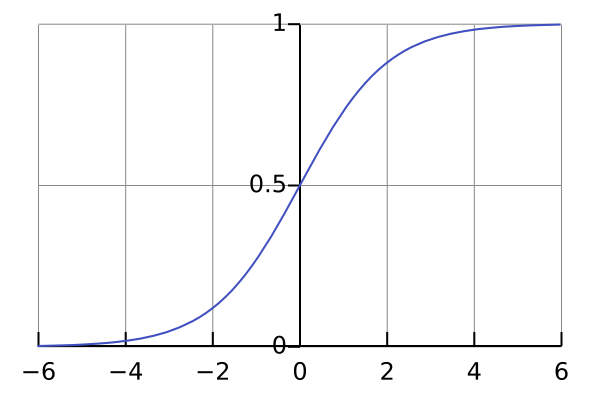

Tak jak w przypadku funkcji skokowej Heaviside'a, funkcja mapuje dowolną wartość rzeczywistą na wartości z przedziału $(0,1)$. Wartość funkcji może być rozumiana jako prawdopodobieństwo wyniku pozytywnego. Przykładowo, jeśli $f(x) = 0.9$, to prawdopodobieństwo $1$ jest równe $90\%$. Czyli jeśli mamy problem klasyfikacji binarnej, a $1$ oznacza np. obecność wirusa grypy w organiźmie, to możemy powiedzieć, że na $90\%$ jesteśmy chorzy na grypę. Warto również zauważyć, że funkcja logistyczna zmierza do $1$ dla wartości dodatnich, a dla wartości ujemnych zmierza do $0$. Zmiana predykcji jest w punkcie $0$, gdzie wartość funkcji wynosi $0.5$.

Zaletą funkcji sigmoidalnej jest łatwa do obliczenia pochodna:

$$f(x)' = f(x)(1-f(x))$$

Algorytm, który wykorzystuje tę funkcję aktywacji nazywany jest **regresją logistyczną**. Nazwa może być myląca i może sugerować, że służy on do rozwiązywania problemów regresji, ale w rzeczywistości wykorzystywany jest do problemów klasyfikacji.

Finalnie, nasza hipoteza będzie wyglądać następująco.

$$h_w(x) = f(\sum_{i=0}^{n}{w_ix_i})$$

$$s = \sum_{i=0}^{n}{w_ix_i}$$

$$f(s) = \frac{1}{1+e^{-s}}$$

### Funkcja błędu

Poznaliśmy już jedną funkcję błędu, która wykorzystywana była do obliczenia błędu regresji liniowej (i wielomianowej). W przypadku regresji logistycznej nie możemy z niej skorzystać, ponieważ regresja logistyczna spowoduje, że taka funkcja będzie miała wiele lokalnych minimum, a co za tym idzie, znalezienie optymalnego zestawu wag będzie bardzo trudne. W związku z tym, konieczne jest znalezienie innej funkcji błędu. Powszechna funkcja błędu, która jest wykorzystywana w algorytmie regresji logistycznej ma następującą formę.

$$
Cost(h_w(x), y) =
\begin{cases}
-log(h_w(x))        &   \mathrm{if} \ y=1,\\
-log(1 - h_w(x))    &   \mathrm{if} \ y=0
\end{cases}
$$

Gdzie $y$ jest prawdziwą wartością.

<table>
    <tr>
        <td> <img src="attachment:cost1.png" alt="Drawing" style=""/> </td>
        <td> <img src="attachment:cost0.png" alt="Drawing" style=""/> </td>
    </tr>
</table>

Czyli jeśli $y=0$, to funkcja kosztu będzie mieć wartość $0$, tylko jeśli hipoteza będzie mieć wartość $0$. Jeśli $h_w(x)$ zmierza do $1$, to funkcja kosztu zmierza do nieskończoności. 

Analogicznie, jeśli $y=1$, to funkcja kosztu będzie równa $0$ tylko, gdy hipoteza będzie równa $1$. Jeśli $h_w(x)$ będzie zmierzać do $0$, to wartość funkcji kosztu będzie zmierzać do nieskończoności.

Zapis powyższej funkcji błędu może zostać uproszczony do jednego równania:

$$Cost(h_w(x), y) = -y\:log(h_w(x)) - (1 - y)\:log(1 - h_w(x))$$

Dlaczego można tak zrobić? Zauważmy, że jeśli $y=0$, to pierwsza część równania się zeruje, zostaje jedynie druga. Natomiast jeśli $y=1$, to zeruje się druga część równania, zostawiając jedynie pierwszą.

### Trenowanie modelu

Wzór na funkcję błędu dla regresji logistycznej można zapisać jako:

$$J(w) = \frac{1}{m} \sum_{i=1}^{m}Cost(h_w(x^{(i)}),y^{(i)}) = - \frac{1}{m} [\sum_{i=1}^{m} y^{(i)} log(h_w(x^{(i)})) + (1 - y^{(i)}) log(1 - h_w(x^{(i)}))]$$

Dobór wag przeprowadzony zostanie z wykorzystaniem algorytmu gradientu prostego. Tak jak w przypadku algorytmu regresji liniowej, w każdej epoce obliczone zostaną nowe wagi, które powinny skutkować zmniejszeniem błędu. W algorytmie perceptronu wagi akutalizowane były po każdej próbce uczącej, natomiast tutaj po jednym przejściu zestawu uczącego. Istnieją różne warianty ilości próbek, po których wagi są aktualizowane, jednak dla uproszczenia wybieramy cały zbiór.

Dobra wiadomość jest taka, że proces aktualizacji wag wygląda praktycznie identycznie, jak miało to miejsce w przypadku algorytmu regresji liniowej. Pochodna funkcji błędu dla $j$-tej wagi ma postać: 

$$\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum^{m}_{i=1} (h_w(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

Zatem wagi akutalizujemy tak, jak robiliśmy to uprzednio:

$$w_j = w_j - \alpha \frac{\partial J(w)}{\partial w_j} = w_j - \frac{\alpha}{m} \sum^{m}_{i=1} (h_w(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

Proces aktualizacji wag wynika bezpośrednio z obliczenia pochodnej funkcji błędu względem wag. W tym notatniku nie będziemy przechodzić przez cały ten proces. Dla osób, które chcą poznać matematyczne detale, przekształcenia opisane są np. [tutaj](https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17).

_Powyższy zapis jest w formie iteracyjnej, a w notaniku z regresją liniową był w formie macierzowej. Te dwa zapisy są równoznaczne i warto znać i rozumieć obie formy._

### Regresja logistyczna a perceptron

Powyższy algorytm w formie z sigmoidalną funkcją aktywacji bardzo często wykorzystywany jest jako podstawowy element wielowarstwowych sieci neuronowych. Jego dobre zrozumienie znacznie ułatwi zrozumienie sposobu działania sieci neuronowych. Porównując ze sobą działania algorytmu regresji logistycznej, a wcześniej implementowanego perceptronu, na pojedynczych neuronach nie widać róznic. Obie implementacje służą do rozwiązywania problemów klasyfikacji w zbiorach liniowo separowalnych. Ich celem jest wyznaczenie prostej separującej próbki pochodzące z różnych klas. Różnica pojawia się w momencie, gdy chcemy stworzyć strukturę złożoną z wielu neuronów. Wykorzystanie w tym celu perceptronu nie jest możliwe, ponieważ sieci neuronowe trenowane są najcześciej z wykorzystaniem algorytmu opartego o obliczenie gradientu funkcji błędu.

Struktury złożone z wielu neuronów mogą rozwiązywać problemy nieliniowo separowalne. Daje to duże możliwości i tłumaczy duże zainteresowanie sieciami neuronowymi. Innym sposobem na rozwiązanie problemu nieliniowo separowalnego może być rozwinięcie hipotezy o wielomianową formę, tak jak robiliśmy to w przypadku regresji wielomianowej.

### Zadanie 1

Zaimplementuj opisany algorytm regresji logistycznej, który będzie skutecznie klasyfikował próbki z liniowo separowalnego zestawu danych. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
np.random.seed(42)

In [3]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.accuracy_history = []
        self.cost_history = []
        self.weights_history = []
        self.bias_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        cost = - (y * np.log(h) + (1 - y) * np.log(1 - h))
        return np.mean(cost)

    def fit(self, X, y, threshold=0.5):
        m, n = X.shape
        
        self.weights = np.random.uniform(-0.5, 0.5, size=n)
        self.bias = 0
        
        self.cost_history = []
        self.weights_history = []
        self.bias_history = []
        self.accuracy_history = []

        for i in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            cost = self.cost_function(y_predicted, y)
            accuracy = np.mean((y_predicted > threshold) == y)

            self.weights_history.append(self.weights.copy())
            self.bias_history.append(self.bias)
            self.cost_history.append(cost)
            self.accuracy_history.append(accuracy)

            if accuracy == 1.0:
                print(f'Dokładność 100% osiągnięta w epoce {i+1}. Zatrzymanie treningu.')
                break

            dw = (1 / m) * np.dot(X.T, (y_predicted - y))
            db = (1 / m) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        print(f'Końcowa dokładność: {self.accuracy_history[-1]*100:.2f}% po {len(self.accuracy_history)} epokach')

        return self.accuracy_history, self.weights_history, self.bias_history

    def predict(self, X, threshold=0.5):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        return np.array(predicted_cls)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

### Zadanie 2

Wczytaj zbiór danych znajdujący się w pliku Ankieta.csv, stwórz wykres próbek. Następnie stwórz 3 wykresy na których przedstawisz jak zmieniała się granica decyzyjna zaimplementowanego algorytmu regresji logistycznej na przestrzeni epok. Porównaj wynik z algorytmem perceptronu (zarówno czas działania jak i jakość wyznaczonej granicy decyzyjnej)

**Uwaga:** Przed podaniem danych na wejście klasyfikatora należy je znormalizować. Zbyt duże wartości powodują, że logarytmy liczą się niepoprawnie (log(0) daje NaN). Dla zainteresowanych wyjaśnienie dostępne jest [tutaj](https://stackoverflow.com/questions/35419882/cost-function-in-logistic-regression-gives-nan-as-a-result)

In [4]:
def generate_initial_weights(n_features):
    return np.random.uniform(-0.5, 0.5, size=n_features + 1)

def calculate_weighted_sum(weights, inputs):
    return np.dot(weights, inputs)

def heaviside_activation(weighted_sum):
    return 1 if weighted_sum > 0 else 0

def perceptron_predict(weights, inputs):
    weighted_sum = calculate_weighted_sum(weights, inputs)
    return heaviside_activation(weighted_sum)

def update_weights(prediction, weights, inputs, actual_label, learning_rate):
    error = actual_label - prediction
    return weights + learning_rate * error * inputs
    
def train_perceptron(data, epochs, learning_rate, score_threshold, improvement_threshold):
    n_features = data.shape[1] - 1
    weights = generate_initial_weights(n_features)
    scores = []
    weights_epochs = []
    
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    X_with_bias = np.insert(X, 0, 1, axis=1)
    n_samples = len(y)
    
    for epoch in range(epochs):
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        
        for idx in indices:
            inputs = X_with_bias[idx]
            actual_label = y[idx]
            
            prediction = perceptron_predict(weights, inputs)
            
            if prediction != actual_label:
                weights = update_weights(prediction, weights, inputs, actual_label, learning_rate)
            
        weights_epochs.append(weights.copy())
        
        activations = np.dot(X_with_bias, weights)
        predictions_all = np.where(activations > 0, 1, 0)
        current_score = np.mean(predictions_all == y)
        
        scores.append(current_score)

        if epoch > 10:
            if scores[-1] >= score_threshold:
                print(f"Przerwanie (epoka {epoch}): Osiągnięto próg dokładności, dokładność: {scores[-1]*100:.2f}%.")
                break
            
            if abs(scores[-1] - scores[-2]) < improvement_threshold:
                print(f"Przerwanie (epoka {epoch}): Brak znaczącej poprawy ({abs(scores[-1] - scores[-2]):.4f}).")
                break

    return scores, weights_epochs

In [5]:
data = pd.read_csv('Ankieta.csv')
data['Plec'] = data['Plec'].map({'Kobieta': 1, 'Mezczyzna': 0})
data.head()

,Waga,Wzrost,Plec
0,55,160,1
1,78,180,0
2,55,150,1
3,99,196,0
4,90,180,0


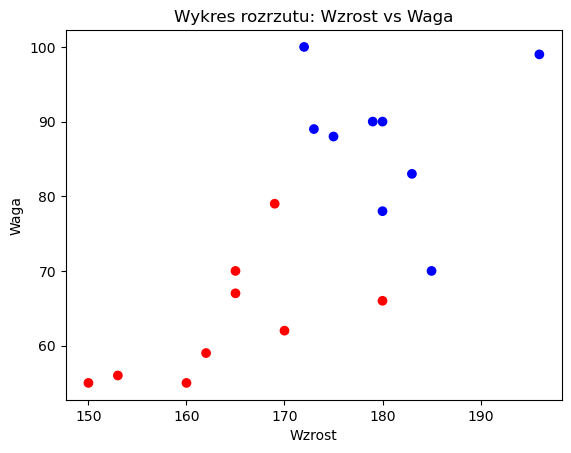

In [6]:
plt.scatter(data['Wzrost'], data['Waga'], c=data['Plec'], cmap='bwr')
plt.xlabel('Wzrost')
plt.ylabel('Waga')
plt.title('Wykres rozrzutu: Wzrost vs Waga')
plt.show()

In [7]:
X = data[['Wzrost', 'Waga']].values
y = data['Plec'].values

X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

In [8]:
start_time = time.time()
LR = LogisticRegression(learning_rate=0.5, epochs=100)
accuracy_history, weights_history, bias_history = LR.fit(X_normalized, y, threshold=0.5)
end_time = time.time()
print(f"Czas treningu: {end_time - start_time:.4f} sekund")

Dokładność 100% osiągnięta w epoce 25. Zatrzymanie treningu.
Końcowa dokładność: 100.00% po 25 epokach
Czas treningu: 0.0106 sekund


In [9]:
data_p = pd.DataFrame(X_normalized, columns=['Wzrost', 'Waga'])
data_p['Plec'] = y

start_time = time.time()
score, weights_epochs = train_perceptron(data_p, epochs=3000, learning_rate=0.5, score_threshold=1.0, improvement_threshold=0)
end_time = time.time()
print(f"Czas treningu perceptronu: {end_time - start_time:.4f} sekund")

Przerwanie (epoka 11): Osiągnięto próg dokładności, dokładność: 100.00%.
Czas treningu perceptronu: 0.0103 sekund


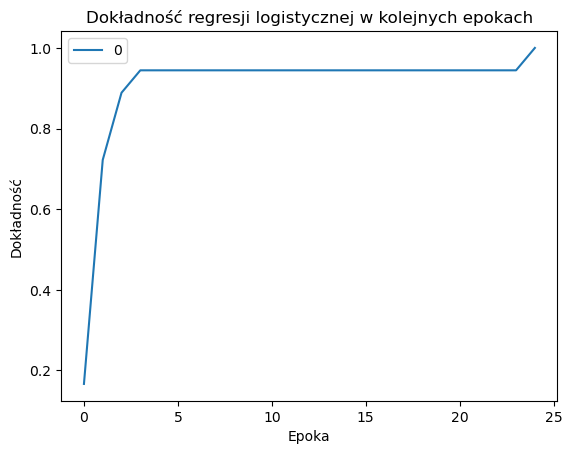

In [10]:
pd.DataFrame(accuracy_history).plot()
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.title('Dokładność regresji logistycznej w kolejnych epokach')
plt.show()

[-0.12545988  0.45071431  0.        ]
[-1.17028543 -0.97765869  0.03123028]
[-1.51775502 -1.50860518  0.11540906]


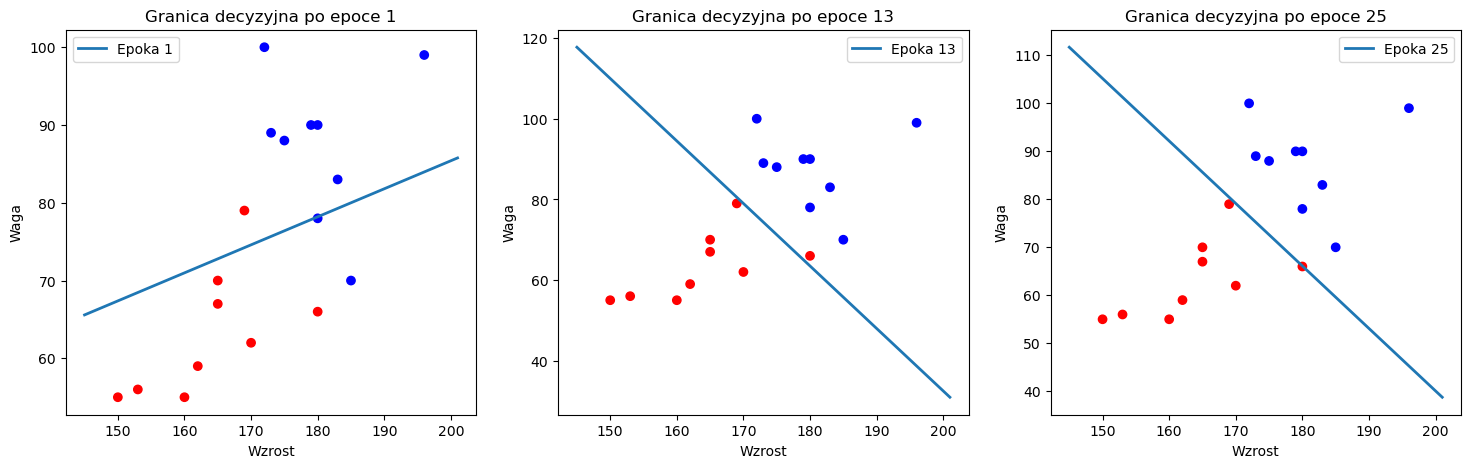

In [11]:
weights_df = pd.DataFrame(weights_history, columns=['w_wzrost', 'w_waga'])
bias_df = pd.DataFrame(bias_history, columns=['bias'])
weights_epochs = pd.concat([weights_df, bias_df], axis=1).values

weights_to_plot = [0, len(weights_epochs)//2, len(weights_epochs)-1]
x_values = np.linspace(data['Wzrost'].min()-5, data['Wzrost'].max()+5, 100)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i in range(3):
    plt.sca(ax[i])
    plt.scatter(data['Wzrost'], data['Waga'], c=data['Plec'], cmap='bwr')
    plt.xlabel('Wzrost')
    plt.ylabel('Waga')
    plt.title(f'Granica decyzyjna po epoce {weights_to_plot[i]+1}')
    
    weights = weights_epochs[weights_to_plot[i]]
    print(weights)
    x_norm = (x_values - X.mean(axis=0)[0]) / X.std(axis=0)[0]
    y_norm = -(weights[0] * x_norm + weights[2]) / weights[1]
    y_values = y_norm * X.std(axis=0)[1] + X.mean(axis=0)[1]
    
    plt.plot(x_values, y_values, label=f'Epoka {weights_to_plot[i]+1}', linewidth=2)
    plt.legend()
    
plt.show()

Dla regresji logistycznej i perceptronu uzyskano dokładność 100% (dla threshold=0.5 w przypadku regresji logistycznej). Dane na których trenowano oba algorytmy są w prosty sposób liniowo separowalne. Ilość epok potrzebnych do osiągniecia 100% dokładności była większa dla regresji logistycznej niż dla perceptronu (25 vs 11, ziarno losowe 42). Pomimo to czas działania regresji logistycznej był podobny do perceptronu, co może wynikać z różnic w implementacji obu algorytmów.

### Zadanie 3

Wykorzystaj stworzony algorym w celu znalezienia granicy decyzyjnej będącej płaszczyzną w trójwymiarowej przestrzeni. Zbiór danych znajduje się w pliku o nazwie 3D_perceptron.csv. Stwórz wykresy analogicznie jak w zadaniu 2. Porównaj wynik z algorytmem perceptronu.

In [12]:
data = pd.read_csv('3D_perceptron.csv')
data.head()

,x1,x2,x3,y
0,2.725907,10.023840,11.224807,1
1,0.680593,15.299426,14.318900,1
2,0.215521,12.710218,11.106429,1
3,-1.739506,-15.825530,-17.599468,0
4,-2.219526,9.772773,10.841995,1


In [13]:
X = data[['x1', 'x2', 'x3']].values
y = data['y'].values

X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

In [14]:
start_time = time.time()
LR = LogisticRegression(learning_rate=0.3, epochs=100)
accuracy_history, weights_history, bias_history = LR.fit(X_normalized, y, threshold=0.5)
end_time = time.time()
print(f"Czas treningu: {end_time - start_time:.4f} sekund")

Dokładność 100% osiągnięta w epoce 5. Zatrzymanie treningu.
Końcowa dokładność: 100.00% po 5 epokach
Czas treningu: 0.0030 sekund


In [15]:
data_p = pd.DataFrame(X_normalized, columns=['x1', 'x2', 'x3'])
data_p['y'] = y

start_time = time.time()
score, weights_epochs = train_perceptron(data_p, epochs=3000, learning_rate=0.5, score_threshold=1.0, improvement_threshold=0)
end_time = time.time()
print(f"Czas treningu perceptronu: {end_time - start_time:.4f} sekund")

Przerwanie (epoka 11): Osiągnięto próg dokładności, dokładność: 100.00%.
Czas treningu perceptronu: 0.0149 sekund


Tym razem algorytm regresji logistycznej radzi sobie lepiej z danymi 3D niż perceptron. Oba osiągają 100% dokładności, ale perceptron potrzebuje więcej epok i dłuższy czas, aby to osiągnąć.

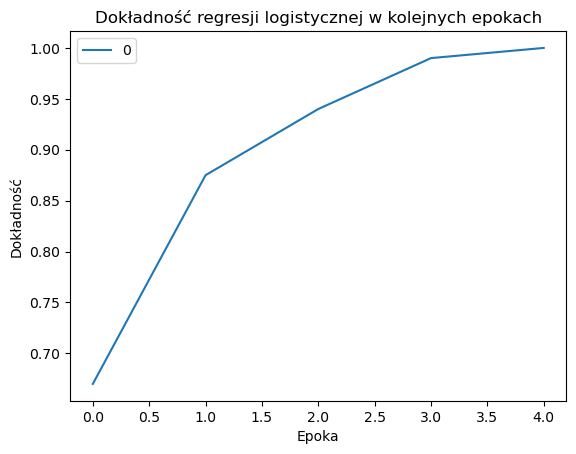

In [18]:
pd.DataFrame(accuracy_history).plot()
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.title('Dokładność regresji logistycznej w kolejnych epokach')
plt.show()

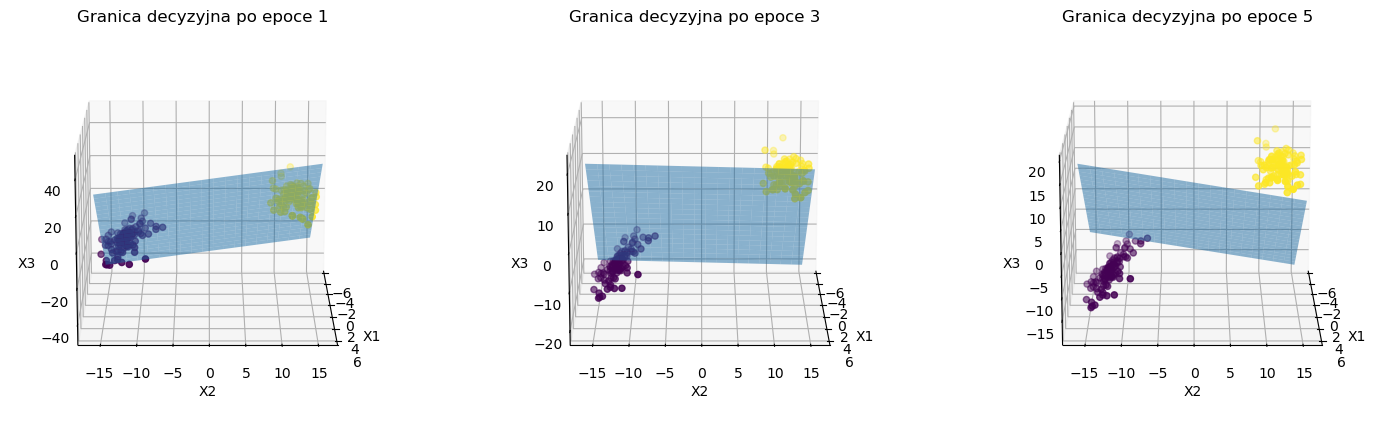

In [19]:
from mpl_toolkits.mplot3d import Axes3D

X_values = data[['x1', 'x2', 'x3']].values
mu = X_values.mean(axis=0)
std = X_values.std(axis=0)

weights_df = pd.DataFrame(weights_history, columns=['x1', 'x2', 'x3'])
bias_df = pd.DataFrame(bias_history, columns=['bias'])
weights_epochs = pd.concat([weights_df, bias_df], axis=1).values

weights_to_plot = [0, len(weights_epochs)//2, len(weights_epochs)-1]

x_range = np.linspace(data['x1'].min(), data['x1'].max(), 20)
y_range = np.linspace(data['x2'].min(), data['x2'].max(), 20)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={'projection': '3d'})

for i, ax_3d in enumerate(axes):
    ax_3d.scatter(data['x1'], data['x2'], data['x3'], c=data['y'])
    ax_3d.view_init(elev=15, azim=0)
    ax_3d.set_xlabel('X1')
    ax_3d.set_ylabel('X2')
    ax_3d.set_zlabel('X3')
    ax_3d.set_title(f'Granica decyzyjna po epoce {weights_to_plot[i]+1}')
    
    weights = weights_epochs[weights_to_plot[i]]
    
    w_x1, w_x2, w_x3, bias = weights[0], weights[1], weights[2], weights[3]
    
    X_grid_norm = (X_grid - mu[0]) / std[0]
    Y_grid_norm = (Y_grid - mu[1]) / std[1]
    
    Z_grid_norm = - (w_x1 * X_grid_norm + w_x2 * Y_grid_norm + bias) / w_x3
    Z_grid = Z_grid_norm * std[2] + mu[2]
    ax_3d.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5)

### Zadanie 4

Zaimplementu test jednostkowy sprawdzający czy błąd spada wraz z epokami.

Koszt początkowy: 0.6256
Koszt końcowy: 0.3134
TEST ZALICZONY: Funkcja kosztu zmalała.
Koszt malał w 4/4 kroków.


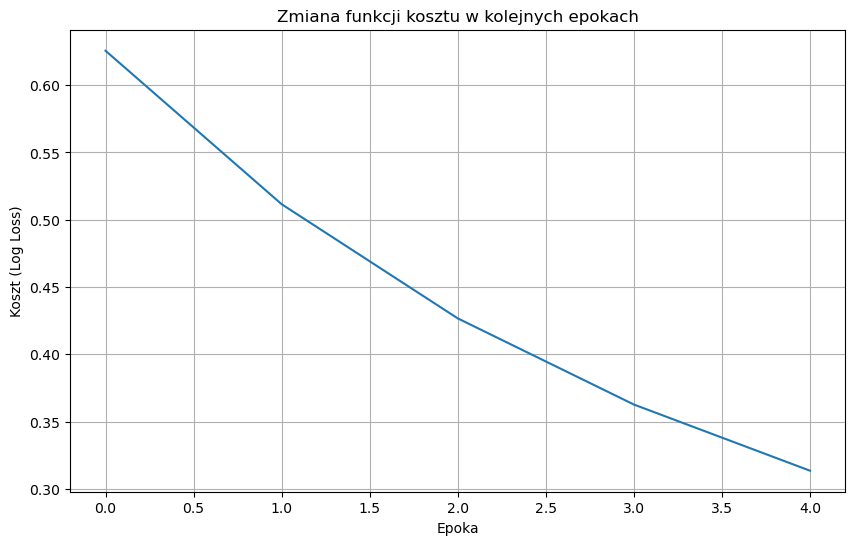

In [20]:
def test_cost_decrease(model):
    cost_history = model.cost_history
    
    initial_cost = cost_history[0]
    final_cost = cost_history[-1]
    
    print(f"Koszt początkowy: {initial_cost:.4f}")
    print(f"Koszt końcowy: {final_cost:.4f}")

    if final_cost < initial_cost:
        print("TEST ZALICZONY: Funkcja kosztu zmalała.")
    else:
        print("TEST NIEZALICZONY: Funkcja kosztu nie zmalała.")
    decreases = 0
    for i in range(1, len(cost_history)):
        if cost_history[i] < cost_history[i-1]:
            decreases += 1
    
    print(f"Koszt malał w {decreases}/{len(cost_history)-1} kroków.")

    plt.figure(figsize=(10, 6))
    plt.plot(cost_history)
    plt.title("Zmiana funkcji kosztu w kolejnych epokach")
    plt.xlabel("Epoka")
    plt.ylabel("Koszt (Log Loss)")
    plt.grid(True)
    plt.show()

test_cost_decrease(LR)

### Zadanie 5

Zaproponuj i oblicz miarę skuteczności algorytmu regresji logistycznej. Wynik należy podać w % (ile próbek poprawnie zaklasyfikował algorytm) 

In [21]:
data = pd.read_csv('Ankieta.csv')
data['Plec'] = data['Plec'].map({'Kobieta': 1, 'Mezczyzna': 0})

X = data[['Wzrost', 'Waga']].values
y = data['Plec'].values

X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

In [22]:
LR = LogisticRegression(learning_rate=0.5, epochs=100)
accuracy_history, weights_history, bias_history = LR.fit(X_normalized, y, threshold=0.5)

Dokładność 100% osiągnięta w epoce 39. Zatrzymanie treningu.
Końcowa dokładność: 100.00% po 39 epokach


In [23]:
# jako miarę skuteczności proponuję średnią dokładność na zbiorze treningowym (jako że nie mamy osobnego zbioru testowego)
def test_final_accuracy(model, X_normalized, y, threshold=0.5):
    final_accuracy = (model.predict(X_normalized, threshold=threshold) == y).mean() * 100
    print(f"Ostateczna dokładność: {final_accuracy:.2f}% dla progu {threshold}")

In [ ]:
# testy dla różnych progów decyzyjnych - zmieniają one czułość i wpływają na ostateczną dokładność
for threshold in [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]:
    test_final_accuracy(LR, X_normalized, y, threshold=threshold)

Ostateczna dokładność: 55.56% dla progu 0.01
Ostateczna dokładność: 77.78% dla progu 0.1
Ostateczna dokładność: 94.44% dla progu 0.3
Ostateczna dokładność: 100.00% dla progu 0.5
Ostateczna dokładność: 88.89% dla progu 0.7
Ostateczna dokładność: 83.33% dla progu 0.9
Ostateczna dokładność: 66.67% dla progu 0.99


### Zadanie 6

Jak współczynnik uczenia alpha wypływa na wynik oraz ilość epok jakie należy zastosować? Porównaj minimum 5 różnych wartości współczynnika alpha oraz sformułuj wnioski.

Dokładność 100% osiągnięta w epoce 20. Zatrzymanie treningu.
Końcowa dokładność: 100.00% po 20 epokach
Dokładność 100% osiągnięta w epoce 19. Zatrzymanie treningu.
Końcowa dokładność: 100.00% po 19 epokach
Dokładność 100% osiągnięta w epoce 20. Zatrzymanie treningu.
Końcowa dokładność: 100.00% po 20 epokach
Dokładność 100% osiągnięta w epoce 12. Zatrzymanie treningu.
Końcowa dokładność: 100.00% po 12 epokach
Dokładność 100% osiągnięta w epoce 23. Zatrzymanie treningu.
Końcowa dokładność: 100.00% po 23 epokach


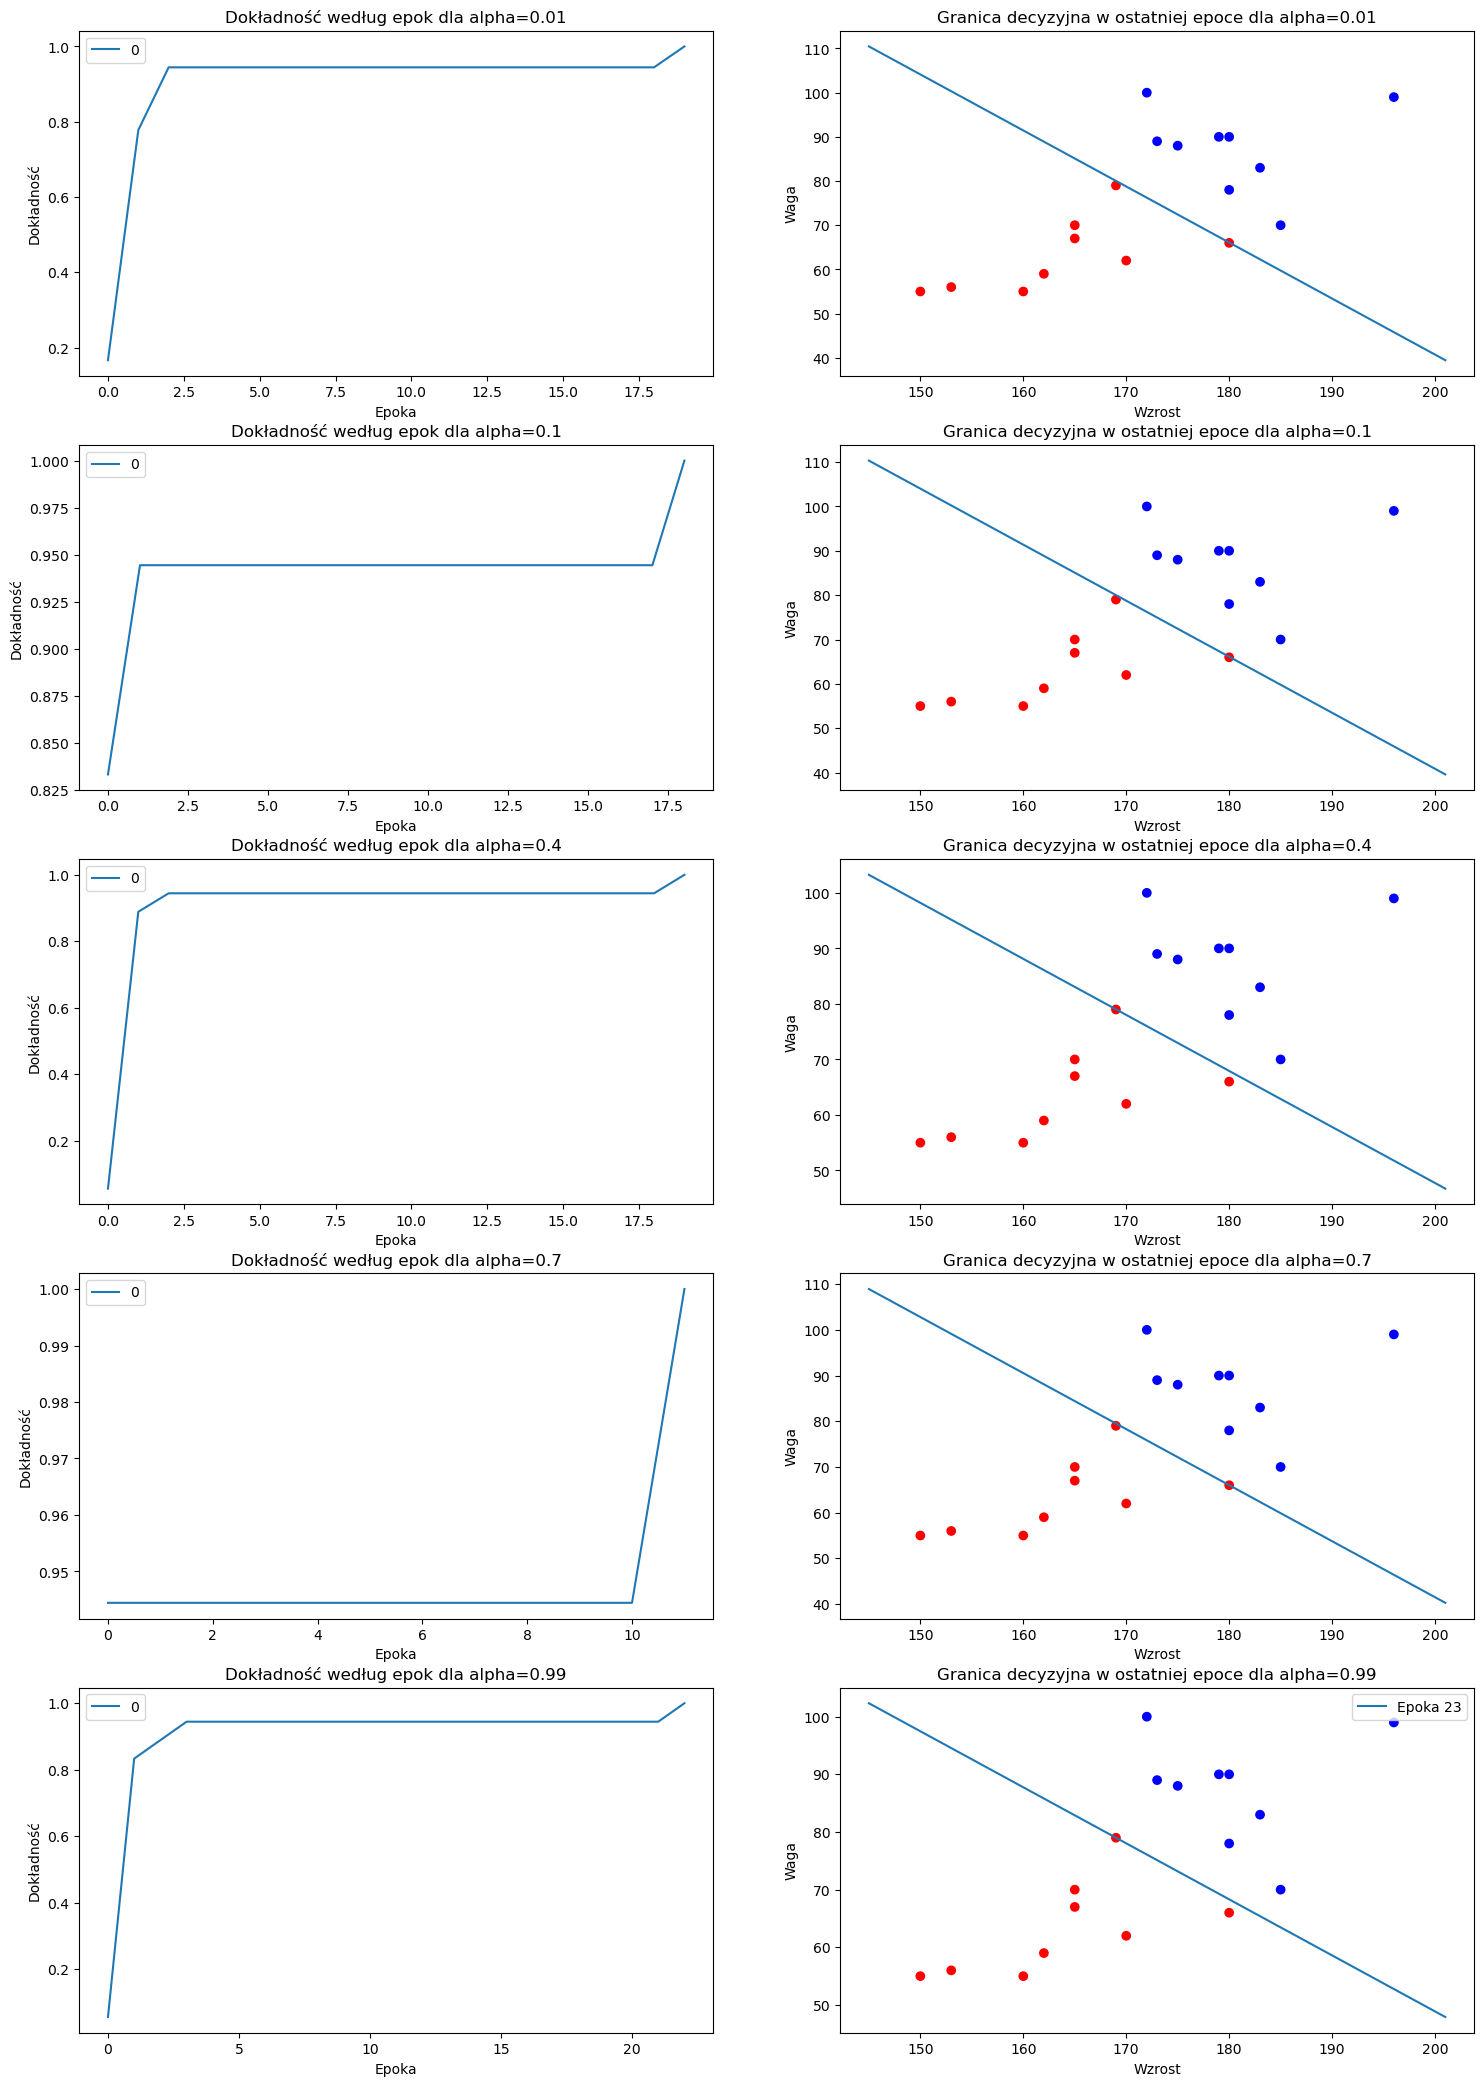

In [25]:
learning_rates = [0.01, 0.1, 0.4, 0.7, 0.99]
x_values = np.linspace(data['Wzrost'].min()-5, data['Wzrost'].max()+5, 100)

fig, ax = plt.subplots(5, 2, figsize=(18, 26))
for i in range(5):
    accuracy_history, weights_history, bias_history = LR.fit(X_normalized, y, threshold=0.5)

    weights_df = pd.DataFrame(weights_history, columns=['w_wzrost', 'w_waga'])
    bias_df = pd.DataFrame(bias_history, columns=['bias'])
    weights_epochs = pd.concat([weights_df, bias_df], axis=1).values

    plt.sca(ax[i, 0])
    pd.DataFrame(accuracy_history).plot(ax=ax[i, 0])
    plt.xlabel('Epoka')
    plt.ylabel('Dokładność')
    plt.title(f'Dokładność według epok dla alpha={learning_rates[i]}')

    plt.sca(ax[i, 1])
    plt.scatter(data['Wzrost'], data['Waga'], c=data['Plec'], cmap='bwr')
    plt.xlabel('Wzrost')
    plt.ylabel('Waga')
    plt.title(f'Granica decyzyjna w ostatniej epoce dla alpha={learning_rates[i]}')
    
    weights = weights_epochs[-1]
    x_norm = (x_values - X.mean(axis=0)[0]) / X.std(axis=0)[0]
    y_norm = -(weights[0] * x_norm + weights[2]) / weights[1]
    y_values = y_norm * X.std(axis=0)[1] + X.mean(axis=0)[1]

    plt.plot(x_values, y_values, label=f'Epoka {len(weights_history)}')

plt.legend()
plt.show()

Dla użytych danych współczynnik uczenia alpha nie wpływa znacząco na ostateczną dokładność modelu ani ilość epok potrzebnych do osiągnięcia maksymalnej dokładności (dla wszystkich około 20 epok, najszybciej dla alpha = 0.7 12 epok, ale różnica nie jest znacząca). Może to wynikać z prostoty problemu i danych. Test należałoby powtórzyć na bardziej złożonych zbiorach danych, aby zobaczyć czy różnice staną się bardziej widoczne.